<a target="_blank" href="https://colab.research.google.com/github/wbfrench1/stock/blob/main/src/get_stock_data.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [20]:
import pandas as pd
import numpy as np
import yfinance as yf
from yahoofinance import HistoricalPrices
import json
import seaborn as sns
from matplotlib import pyplot as plt

# Graph Historical Performance

In [42]:
msft = yf.Ticker("MSFT")
str_period = '5y'
str_interval = '1mo'

### Get Data over a specified period of time and interval

In [43]:
msft.history(period=str_period,
             interval=str_interval).head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-07-01 00:00:00-04:00,92.782768,105.125433,92.688190,100.330238,569352300,0.00,0.0
2018-08-01 00:00:00-04:00,100.282941,106.667076,99.157440,106.241470,456628100,0.42,0.0
2018-09-01 00:00:00-04:00,105.245134,109.460639,101.808176,108.587158,480255500,0.00,0.0
2018-10-01 00:00:00-04:00,108.947952,110.305648,95.048188,101.409416,927548000,0.00,0.0
2018-11-01 00:00:00-04:00,101.637298,106.564874,94.326624,105.283134,720228600,0.46,0.0


In [37]:
msft.info['longName']

'Microsoft Corporation'

In [3]:
msft.info.keys()

dict_keys(['address1', 'city', 'state', 'zip', 'country', 'phone', 'fax', 'website', 'industry', 'industryDisp', 'sector', 'longBusinessSummary', 'fullTimeEmployees', 'companyOfficers', 'auditRisk', 'boardRisk', 'compensationRisk', 'shareHolderRightsRisk', 'overallRisk', 'governanceEpochDate', 'compensationAsOfEpochDate', 'maxAge', 'priceHint', 'previousClose', 'open', 'dayLow', 'dayHigh', 'regularMarketPreviousClose', 'regularMarketOpen', 'regularMarketDayLow', 'regularMarketDayHigh', 'dividendRate', 'dividendYield', 'exDividendDate', 'payoutRatio', 'fiveYearAvgDividendYield', 'beta', 'trailingPE', 'forwardPE', 'volume', 'regularMarketVolume', 'averageVolume', 'averageVolume10days', 'averageDailyVolume10Day', 'bid', 'ask', 'bidSize', 'askSize', 'marketCap', 'fiftyTwoWeekLow', 'fiftyTwoWeekHigh', 'priceToSalesTrailing12Months', 'fiftyDayAverage', 'twoHundredDayAverage', 'trailingAnnualDividendRate', 'trailingAnnualDividendYield', 'currency', 'enterpriseValue', 'profitMargins', 'floatSh

### Graph

[Text(0.5, 1.0, 'Microsoft Corporation')]

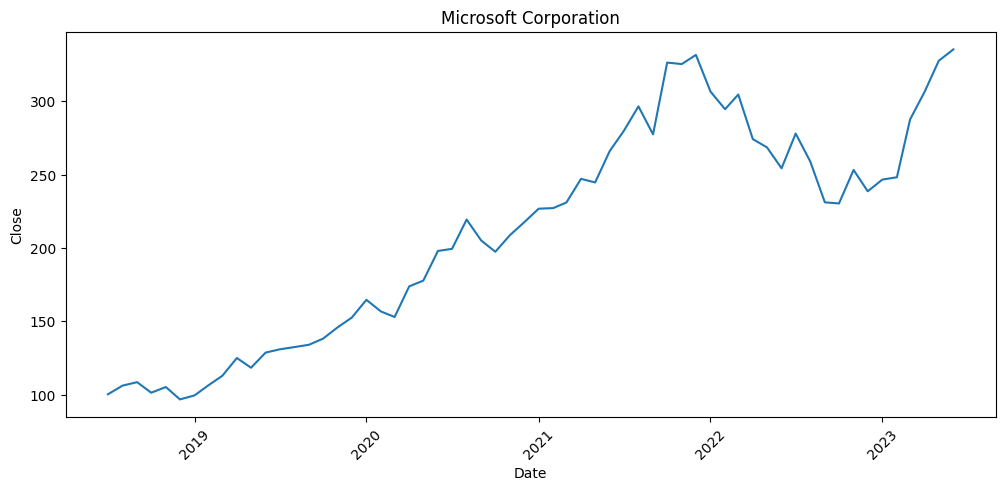

In [44]:
t_figsize = (12,5)
fig, ax = plt.subplots(figsize=t_figsize)
plt.xticks(rotation=45)
sns.lineplot(x= msft.history(period=str_period,
                             interval=str_interval).index, 
             y= msft.history(period=str_period,
                             interval=str_interval)['Close'],
             ax= ax).set(title= msft.info['longName'])

In [17]:
msft.history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-05-03 00:00:00-04:00,305.951182,307.936831,303.426702,303.736023,22360800,0.00,0.0
2023-05-04 00:00:00-04:00,305.571981,307.088685,302.738180,304.743805,22519900,0.00,0.0
2023-05-05 00:00:00-04:00,305.053143,311.289510,303.606293,309.972382,28181200,0.00,0.0
2023-05-08 00:00:00-04:00,309.453528,309.523383,305.422332,307.976746,21318600,0.00,0.0
2023-05-09 00:00:00-04:00,307.328172,309.363730,305.641855,306.330353,21340800,0.00,0.0
2023-05-10 00:00:00-04:00,307.946800,312.317251,306.998891,311.628754,30078000,0.00,0.0
2023-05-11 00:00:00-04:00,309.423575,310.441339,305.591955,309.433533,31680200,0.00,0.0
2023-05-12 00:00:00-04:00,309.872591,309.972379,305.931226,308.296051,19758100,0.00,0.0
2023-05-15 00:00:00-04:00,308.425773,309.224016,306.919057,308.784973,16336500,0.00,0.0


In [5]:
msft.info['open']

334.247

# Get s&p500 stock tickers

In [54]:
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df_sp500_co_info = table[0]
df_sp500_co_info.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [55]:
df_sp500_co_info['Symbol']

0       MMM
1       AOS
2       ABT
3      ABBV
4       ACN
       ... 
498     YUM
499    ZBRA
500     ZBH
501    ZION
502     ZTS
Name: Symbol, Length: 503, dtype: object